# Appendix

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
%matplotlib inline

In [2]:
import json

fn = 'RubygemDigger--Steps--GenerateJsonForLastVersions--8.data.json'
with open(fn) as f: data = json.load(f)
simple_analysis = data["simple_analysis"]
keys = simple_analysis.keys()
d = data["data"]

df = pd.io.json.json_normalize(d)
keys

dict_keys(['nloc', 'avg_ccn', 'avg_nloc', 'avg_token', 'fun_count', 'warning_count', 'fun_rate', 'nloc_rate', 'style_', 'performance_', 'security_', 'lint_', 'lint_duplicate', 'metrics_', 'metrics_abcsize', 'metrics_blocklength', 'metrics_blocknesting', 'metrics_classlength', 'metrics_cyclomaticcomplexity', 'metrics_linelength', 'metrics_methodlength', 'metrics_modulelength', 'metrics_parameterlists', 'metrics_perceivedcomplexity', 'total', 'DuplicateMethodCall', 'FeatureEnvy', 'IrresponsibleModule', 'NilCheck', 'TooManyConstants', 'TooManyMethods', 'UncommunicativeVariableName', 'TooManyStatements', 'UnusedParameters', 'InstanceVariableAssumption', 'TooManyInstanceVariables', 'UtilityFunction', 'PrimaDonnaMethod', 'NestedIterators', 'DataClump', 'UncommunicativeMethodName', 'LongParameterList', 'UncommunicativeParameterName', 'ControlParameter', 'ManualDispatch', 'RepeatedConditional', 'Attribute', 'BooleanParameter', 'SubclassedFromCoreClass', 'UncommunicativeModuleName', 'ModuleInit

In [3]:
def error_rate(field):
    return average_stddev_percent(field) - abs(improved_rate(field))

def improved_rate(field):
    return (field["abandoned"]["avg"] - field["maintained"]["avg"]) * 100 / field["maintained"]["avg"]
def stddev_percent(data):
    return data["stddev"] * 100 / data["avg"]
def average_stddev_percent(field):
    return (stddev_percent(field["maintained"]) + stddev_percent(field["abandoned"])) / 2

In [4]:
def print_label(name, f):
    print("   %s:\tavg: %6.3f\tstddev: %6.3f\tstddev percent:%6.1f%%" %(name, f[name]["avg"], f[name]["stddev"], stddev_percent(f[name])))
    
impacts = {k: error_rate(simple_analysis[k]) for k in keys}
for key in (sorted(impacts.items(), key=lambda x: x[1]))[:10]:
    k = key[0]
    f = simple_analysis[k]
    print("Metrics: %s\tImprovement:%6.1f%%\tError rate:%6.1f%%" % (key[0],improved_rate(f), key[1]))
    for name in ('maintained', 'abandoned', 'with_issues'):
        print_label(name, f)



Metrics: avg_ccn	Improvement:   2.5%	Error rate:  31.3%
   maintained:	avg:  1.807	stddev:  0.576	stddev percent:  31.9%
   abandoned:	avg:  1.853	stddev:  0.661	stddev percent:  35.7%
   with_issues:	avg:  1.680	stddev:  0.319	stddev percent:  19.0%
Metrics: style_	Improvement:  13.4%	Error rate:  34.5%
   maintained:	avg: 40.249	stddev: 19.051	stddev percent:  47.3%
   abandoned:	avg: 45.644	stddev: 22.158	stddev percent:  48.5%
   with_issues:	avg: 42.650	stddev: 13.505	stddev percent:  31.7%
Metrics: avg_nloc	Improvement:  -2.3%	Error rate:  42.5%
   maintained:	avg:  8.441	stddev:  3.748	stddev percent:  44.4%
   abandoned:	avg:  8.246	stddev:  3.721	stddev percent:  45.1%
   with_issues:	avg:  6.920	stddev:  1.375	stddev percent:  19.9%
Metrics: avg_token	Improvement:   3.5%	Error rate:  43.1%
   maintained:	avg: 46.206	stddev: 20.086	stddev percent:  43.5%
   abandoned:	avg: 47.841	stddev: 23.803	stddev percent:  49.8%
   with_issues:	avg: 45.700	stddev: 11.482	stddev percent:  

In [5]:
df = df[df["stat.avg_nloc"]<20]

/Users/terry/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


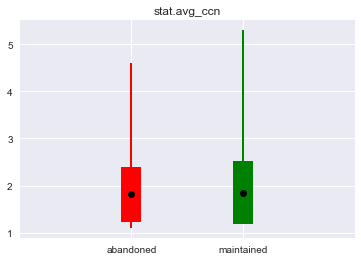

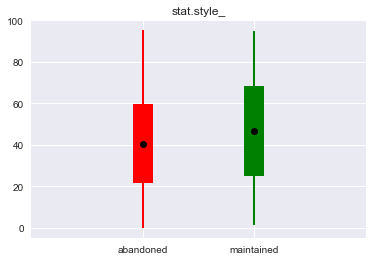

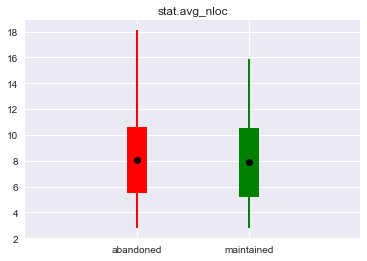

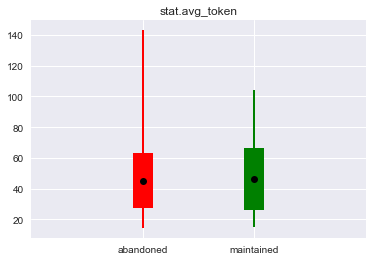

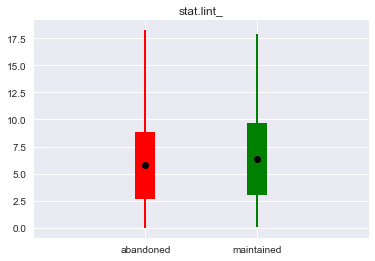

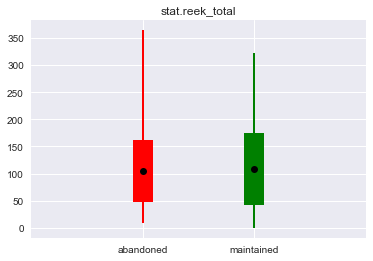

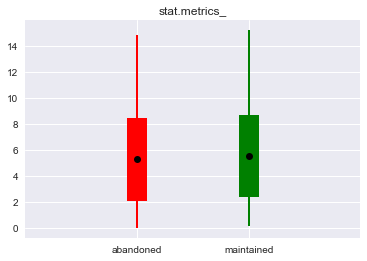

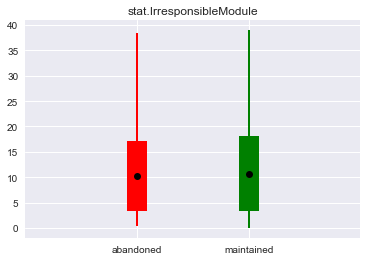

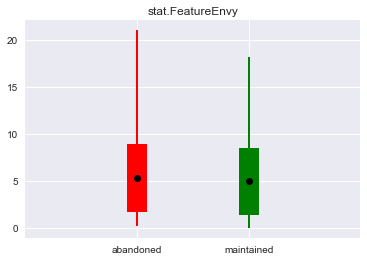

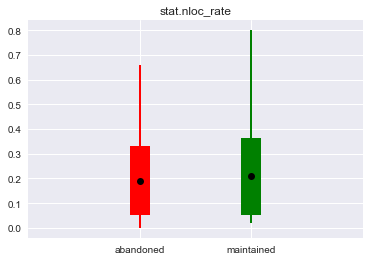

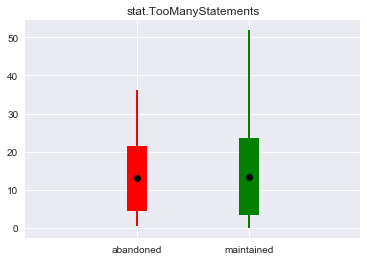

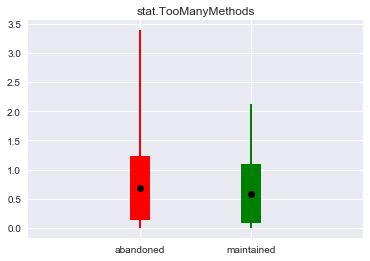

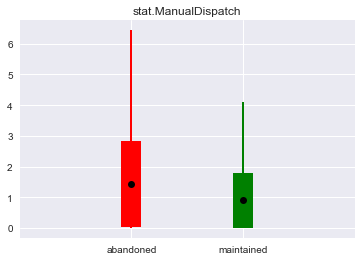

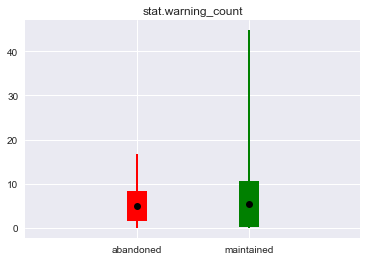

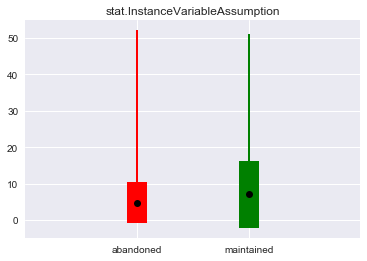

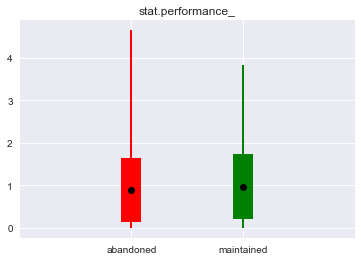

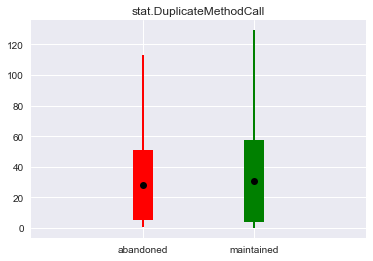

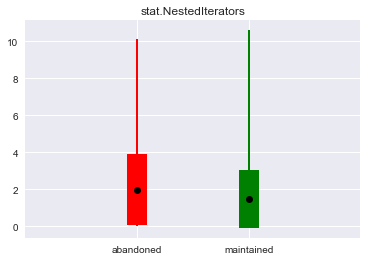

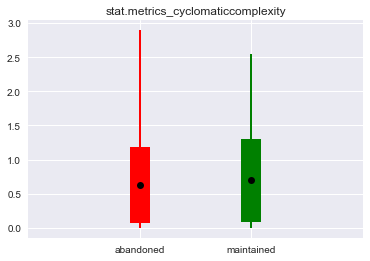

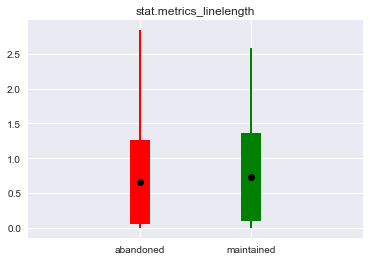

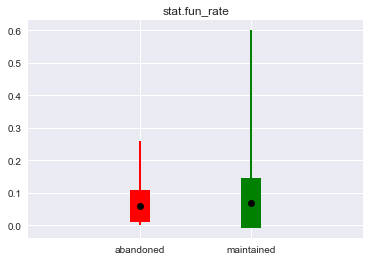

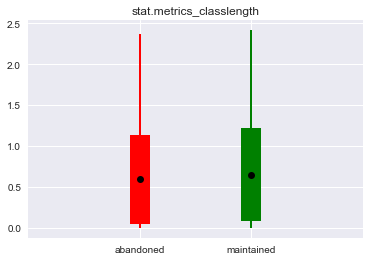

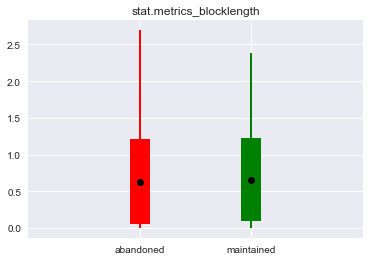

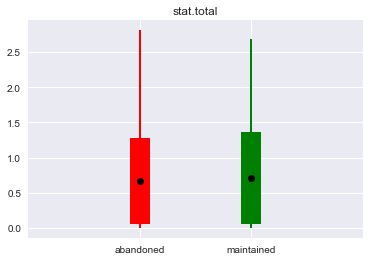

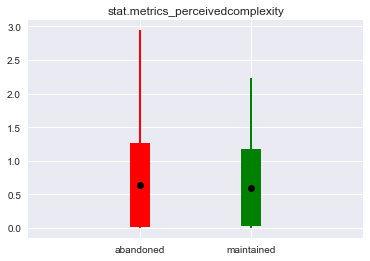

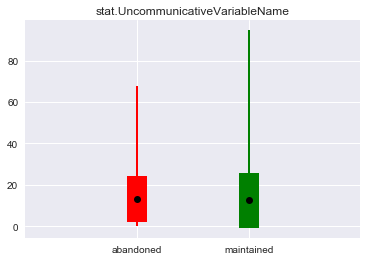

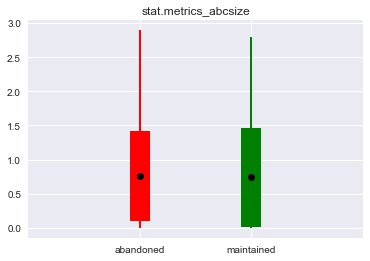

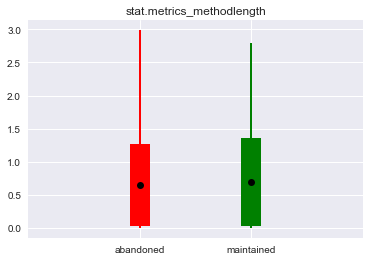

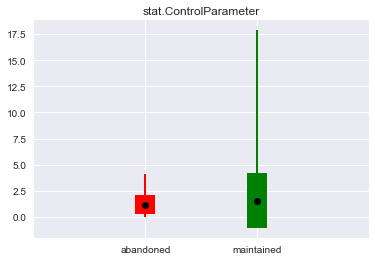

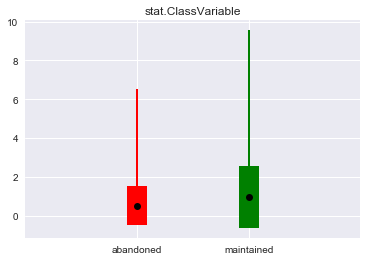

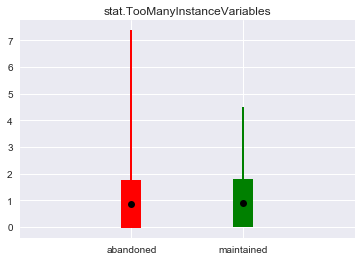

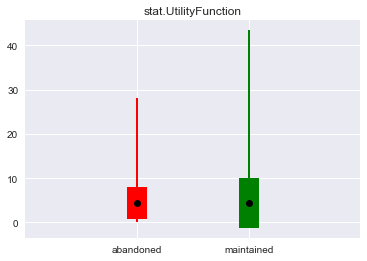

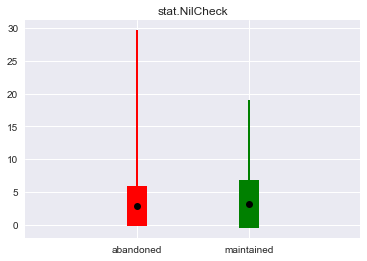

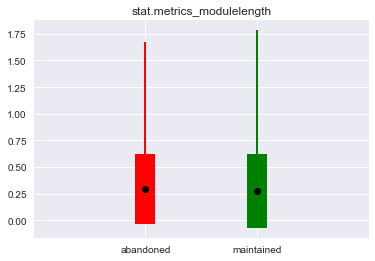

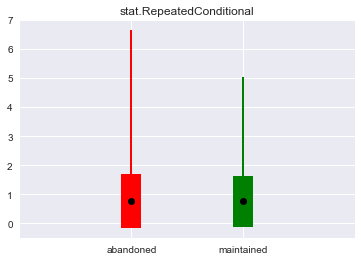

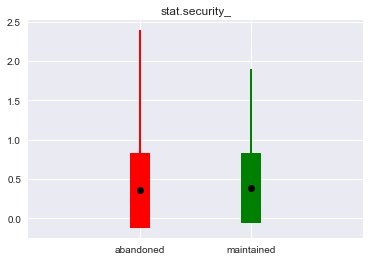

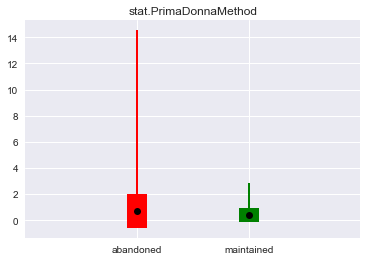

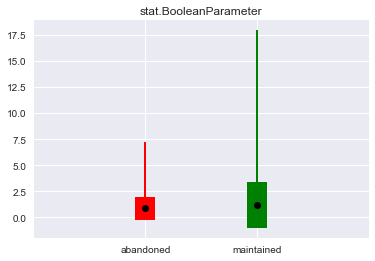

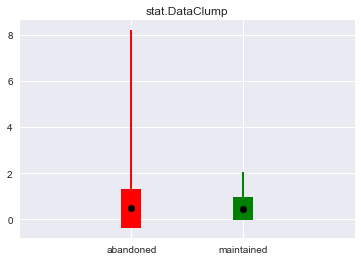

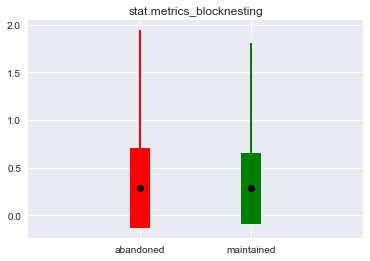

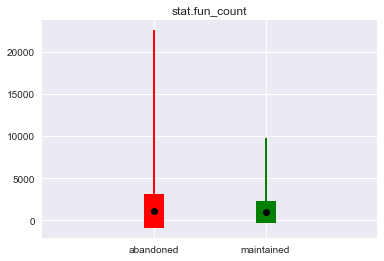

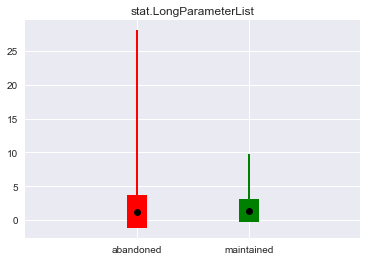

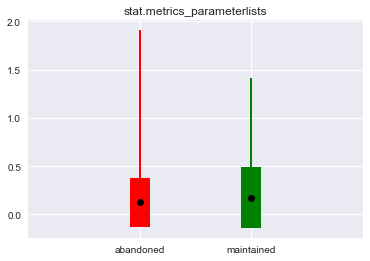

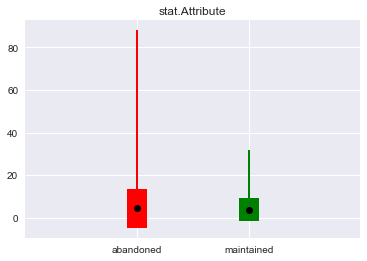

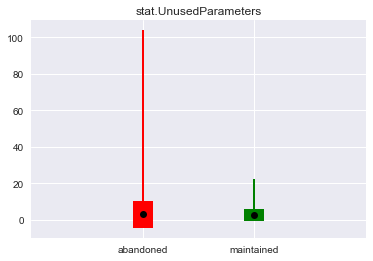

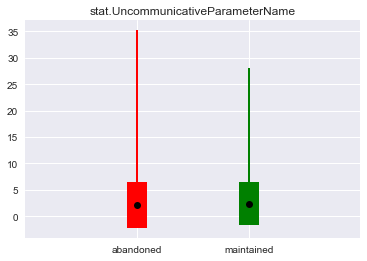

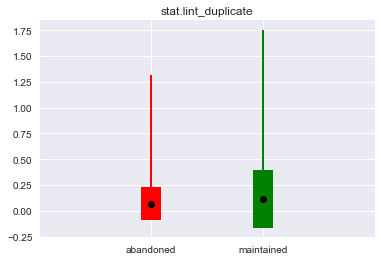

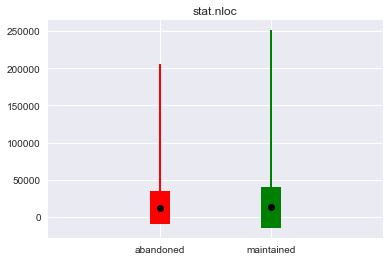

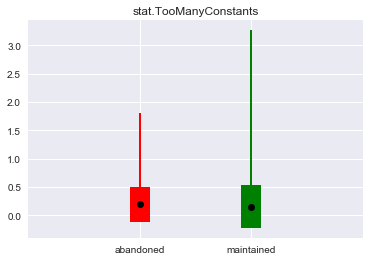

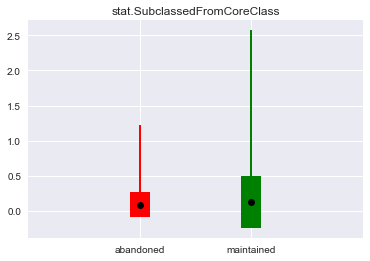

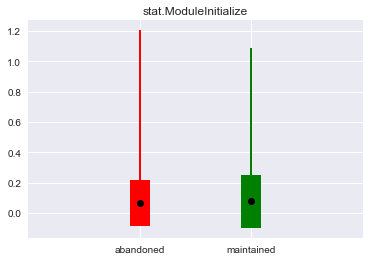

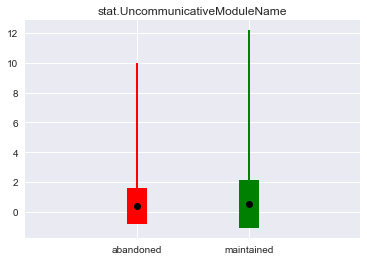

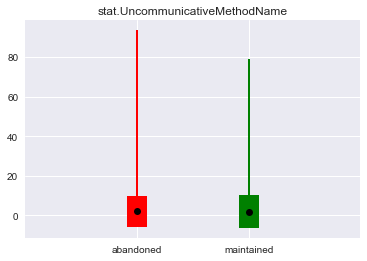

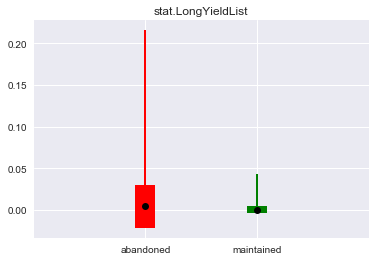

In [6]:
abdf = df[df["label"]=="abandoned"]
mtdf = df[df["label"]!="abandoned"]
x = np.random.randn(100, 2)
field = 'stat.style_'
for k in (sorted(impacts.items(), key=lambda x: x[1]))[:100]:
    field='stat.'+k[0]
    plt.figure(field)
    plt.title(field)
    means = np.array([abdf[field].mean(), mtdf[field].mean()])
    maxes = np.array([abdf[field].max(), mtdf[field].max()])
    mins = np.array([abdf[field].min(), mtdf[field].min()])
    std = np.array([abdf[field].std(), mtdf[field].std()])


    # create stacked errorbars:
    plt.errorbar(np.arange(2), means, std, fmt='ok', ecolor=['red', 'green'], lw=20)
    plt.errorbar(np.arange(2), means, [means - mins, maxes - means],
                 fmt='.k', ecolor=['red', 'green'], lw=2)
    plt.xticks(np.arange(2), ['abandoned', 'maintained'])
    plt.xlim(-1, 2)